In [33]:
import networkx as nx
import csv
import matplotlib.pyplot as plt


In [34]:
class Album:
    def __init__(self, title, artist, genre, year_of_pub, rating):
        self.title= title
        self.artist= artist
        self.genre=genre
        self.year_of_pub= year_of_pub
        self.rating =rating

In [35]:
with open("albums.csv") as csvfile:
    reader =csv.reader(csvfile)
    print(next(reader))

Albums = []
with open("albums.csv") as csvfile:
    reader= csv.DictReader(csvfile)
    for row in reader:
        title=row['album_title']
        artist=row['artist_id']
        genre=row['genre']
        year_of_pub=row['year_of_pub']    
        rating=row['rolling_stone_critic']
        Albums.append(Album(title, artist, genre, year_of_pub, float(rating)))
    

['id', 'artist_id', 'album_title', 'genre', 'year_of_pub', 'num_of_tracks', 'num_of_sales', 'rolling_stone_critic']


In [36]:
AlbumGraph =nx.Graph()
albumSubset=Albums[0:200]

sizes=[]
for a in albumSubset:
    AlbumGraph.add_node(a, title=a.title[:20], rating=a.rating)
    sizes.append(float(rating)*100)
    
colors=[]
for a1 in albumSubset:
    for a2 in albumSubset:
        if not a1==a2:
            if a1.artist==a2.artist:
                AlbumGraph.add_edge(a1,a2)
                colors.append('red')
            if a1.genre==a2.genre:
                AlbumGraph.add_edge(a1,a2)
                colors.append('black')
            if a1.year_of_pub==a2.year_of_pub:
                AlbumGraph.add_edge(a1,a2)
                colors.append('green')

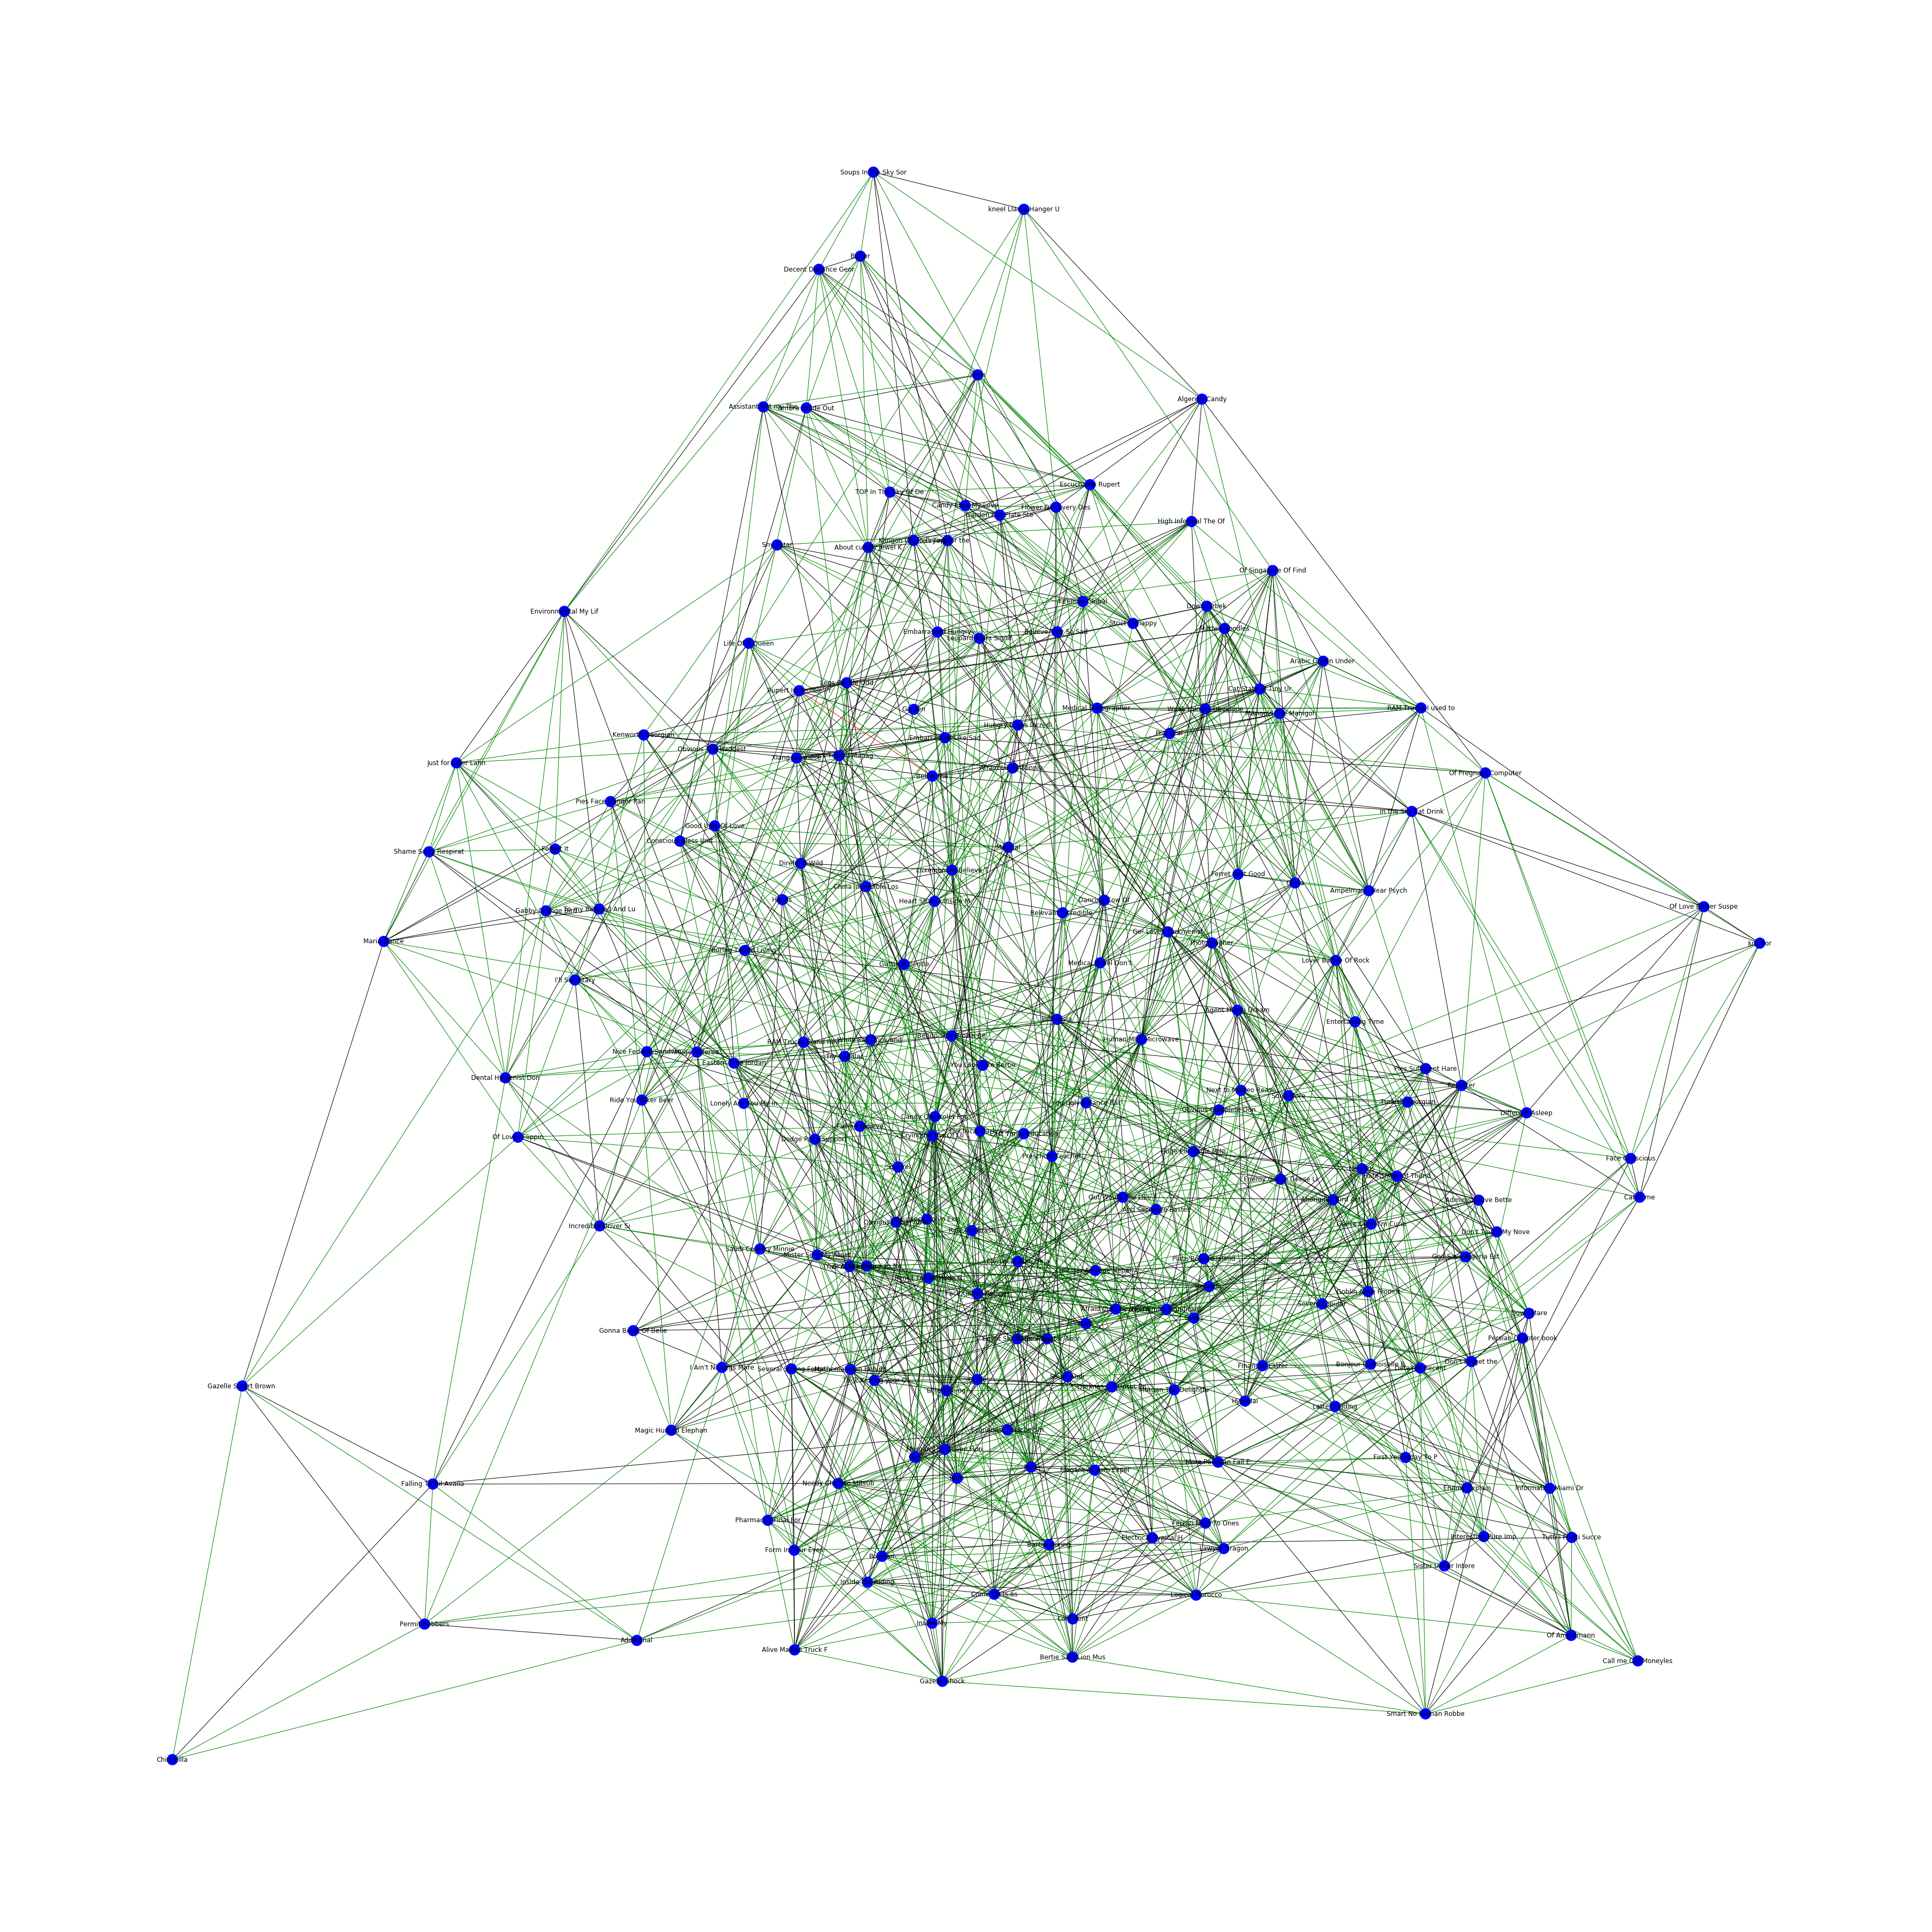

In [37]:
labels= nx.get_node_attributes(AlbumGraph, 'title')
options={'node_color':'blue', 'node_size':sizes,'edge_color':colors,'width':1, 'labels':labels, 'with_labels':True}
plt.figure(1,figsize =(50,50))
nx.draw(AlbumGraph, **options)

The graph shows the connections between different music albums based on genre and artist and publication year. 
Green line means the two albums are publised at the same year.  
Red line means the two albums have the same author.
Black line means the two albums are of the same genere.
The size of nodes represent ratings of albums in rolling_stone_critic.